## Load images and extract features 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[5 6 0]
  [6 7 1]
  [6 7 1]
  ...
  [7 9 8]
  [5 7 6]
  [5 7 6]]

 [[6 7 1]
  [6 7 1]
  [6 7 1]
  ...
  [5 7 6]
  [5 7 6]
  [5 7 6]]

 [[6 7 1]
  [6 7 1]
  [6 7 1]
  ...
  [5 7 6]
  [5 7 6]
  [5 7 6]]]


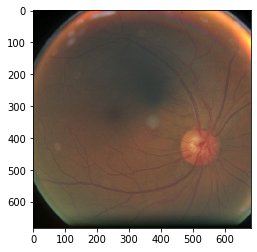

In [44]:
#Load the libraries
import json
import csv
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from skimage.feature import hog
from skimage.color import rgb2grey
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
os.chdir('/Users/Simon/Desktop/Fintech/fintech_DR/')

#Read the labels and match with the corresponding pictures
with open('labels.json') as label:
    data=json.load(label)
i = 0
name = []
lb = []
for i in range(len(data)):
    name.append(data[i][0])
    lb.append(data[i][1])
    i = i + 1
def get_image(pic_name, root = "images/"):
    filename = "{}".format(pic_name)
    file_path = os.path.join(root,filename)
    img = Image.open(file_path)
    #resized_img = img.resize((256, 256), Image.ANTIALIAS)
    return np.array(img)

#Output the first picture as an example
plt.imshow(get_image(name[0]))
pic_sample = get_image(name[0])

#Ouptut the example image's pixel features
print(pic_sample)

#k=pd.DataFrame(data)
#file_path=os.path.join("images/",name)
#img=Image.open(file_path)
#print(np.array(img))

In [46]:
import pickle
with open('test_set.pkl', 'rb') as f:
        test_set = pickle.load(f)
with open('training_set.pkl', 'rb') as f1:
        train_set = pickle.load(f1)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.02099961 0.02492118 0.02492118 ... 0.03334471 0.02550157 0.02550157]
 [0.02492118 0.02492118 0.02492118 ... 0.02550157 0.02550157 0.02550157]
 [0.02492118 0.02492118 0.02492118 ... 0.02550157 0.02550157 0.02550157]]


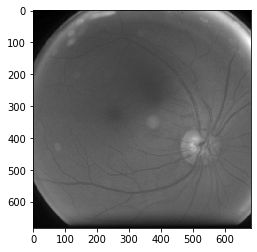

In [2]:
grey_pic_sample=rgb2grey(pic_sample) 
plt.imshow(grey_pic_sample,cmap=mpl.cm.gray) 
print(grey_pic_sample)

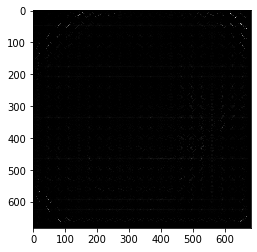

In [25]:
#Extract the Histogram of Oriented Gradient features of the images
hog_features, hog_pic=hog(grey_pic_sample, visualize=True, block_norm='L2-Hys', pixels_per_cell=(32,32),cells_per_block=(1,1))
plt.imshow(hog_pic,cmap=mpl.cm.gray)

In [39]:
def create_features(img):
    color_features=np.array(img).flatten()
    grey_image=rgb2grey(img) 
    hog_features=hog(grey_image,visualize=True, block_norm='L2-Hys',pixels_per_cell=(16,16), cells_per_block=(1,1))
    flat_features=np.hstack(np.array(hog_features)[:, np.newaxis]) 
    return flat_features

In [40]:
pic_sample_features=create_features(pic_sample) 
print(pic_sample_features)

[array([0.50570183, 0.        , 0.40777879, ..., 0.06330808, 0.09925495,
       0.05793862])
 array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])]
